 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [180]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path


%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [181]:
# Reading whale returns
Whale_data = Path('../Starter_Code/Resources/whale_returns.csv')
Whale_df = pd.read_csv(Whale_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

Whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [182]:
# Count nulls
Whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [183]:
# Drop nulls
Whale_df = Whale_df.dropna()

Whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [184]:
# Reading algorithmic returns
algo_data = Path('../Starter_Code/Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [185]:
# Count nulls
algo_df.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [186]:
# Drop nulls
algo_df_returns = algo_df.dropna()


algo_df_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [187]:
# Reading S&P 500 Closing Prices
sp500_data = Path('../Starter_Code/Resources/sp500_history.csv')
sp500_df = pd.read_csv(sp500_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [188]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [189]:
# Fix Data Types
sp500_df["Close"]= sp500_df["Close"].str.replace('$','').astype("float")

sp500_df.sort_index(inplace=True, ascending=True)

sp500_df.head()

c:\Users\CHD\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [190]:
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [191]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()

sp500_daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [192]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()

sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [193]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns = {"Close":"sp500"}, inplace=True)

sp500_daily_returns

c:\Users\CHD\anaconda3\envs\dev\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,sp500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [194]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
daily_returns = pd.concat([Whale_df, algo_df,sp500_daily_returns], axis = "columns",join = "inner")

daily_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

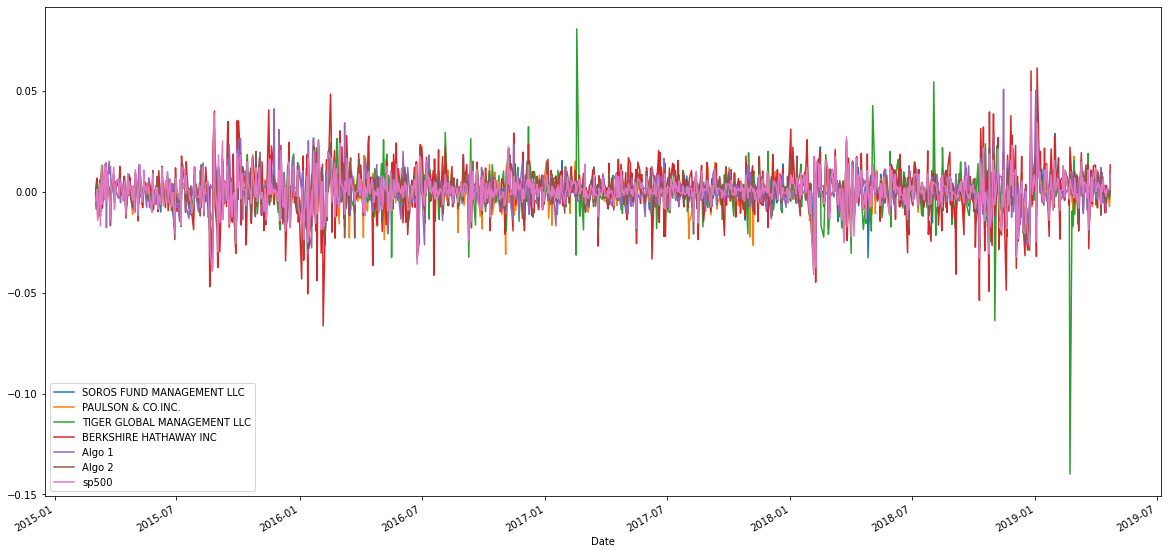

In [195]:
# Plot daily returns of all portfolios
daily_returns.plot(figsize= (20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

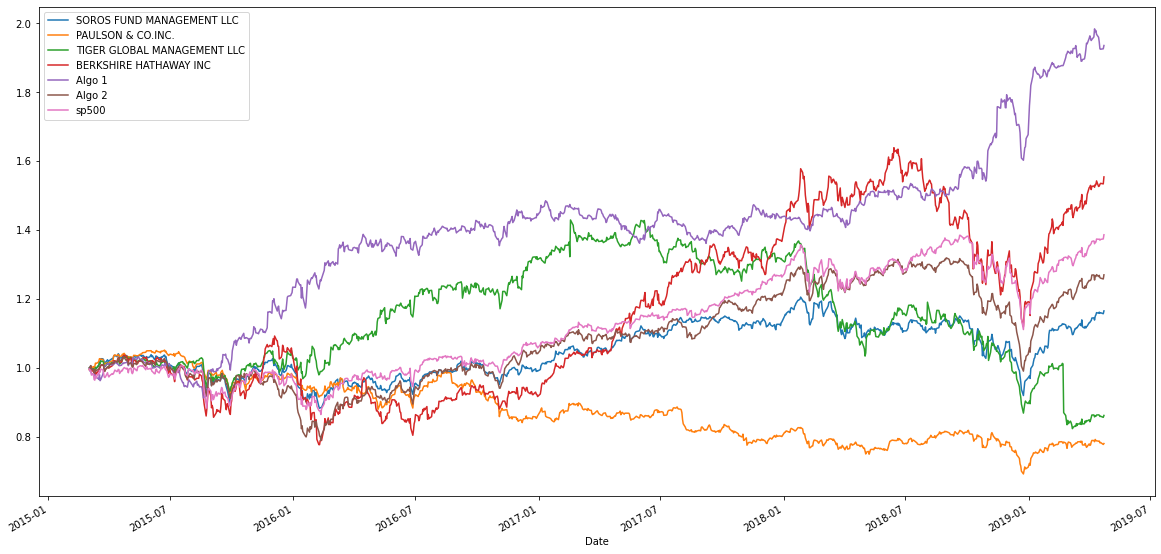

In [196]:
# Calculate cumulative returns of all portfolios
daily_cumlative = (1+ daily_returns).cumprod()
# Plot cumulative returns
daily_cumlative.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

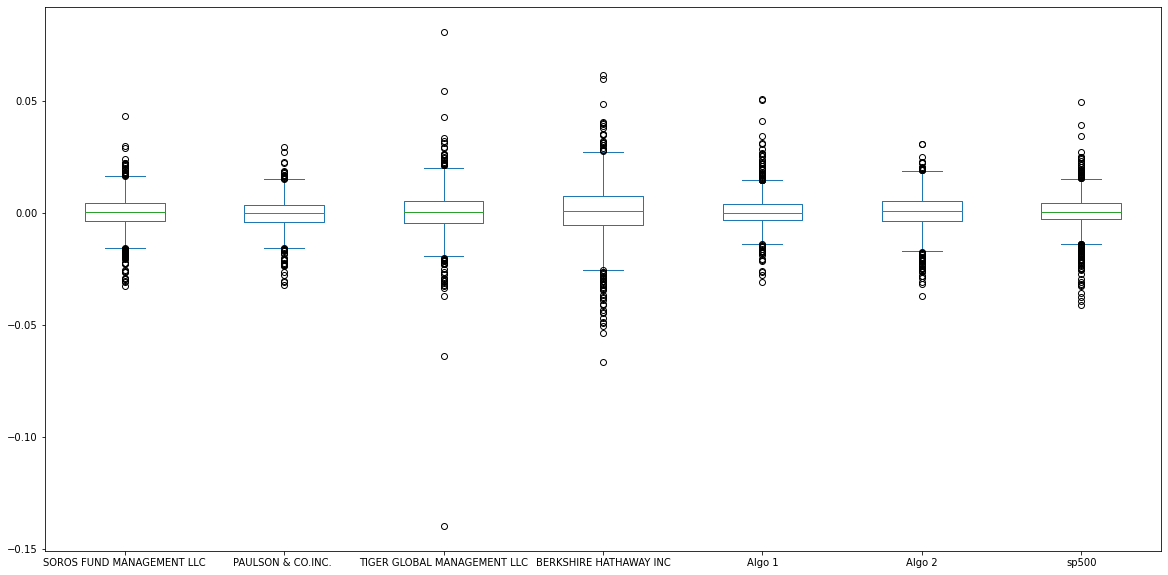

In [197]:
# Box plot to visually show risk
daily_returns.plot(kind = "box", figsize = (20,10))

### Calculate Standard Deviations

In [198]:
# Calculate the daily standard deviations of all portfolios
daily_std = pd.DataFrame(daily_returns.std())
daily_std = daily_std.rename(columns = {0:"std"})
daily_std

,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
sp500,0.008554


### Determine which portfolios are riskier than the S&P 500

In [199]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = pd.DataFrame(sp500_daily_returns.std())


# Determine which portfolios are riskier than the S&P 500
riskier_std = daily_std[daily_std["std"] > daily_std.loc["sp500", "std"]]



In [200]:
#Tiger and Hathway are more risky 

### Calculate the Annualized Standard Deviation

In [201]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = daily_std*np.sqrt(252)

annual_std

,std
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
sp500,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

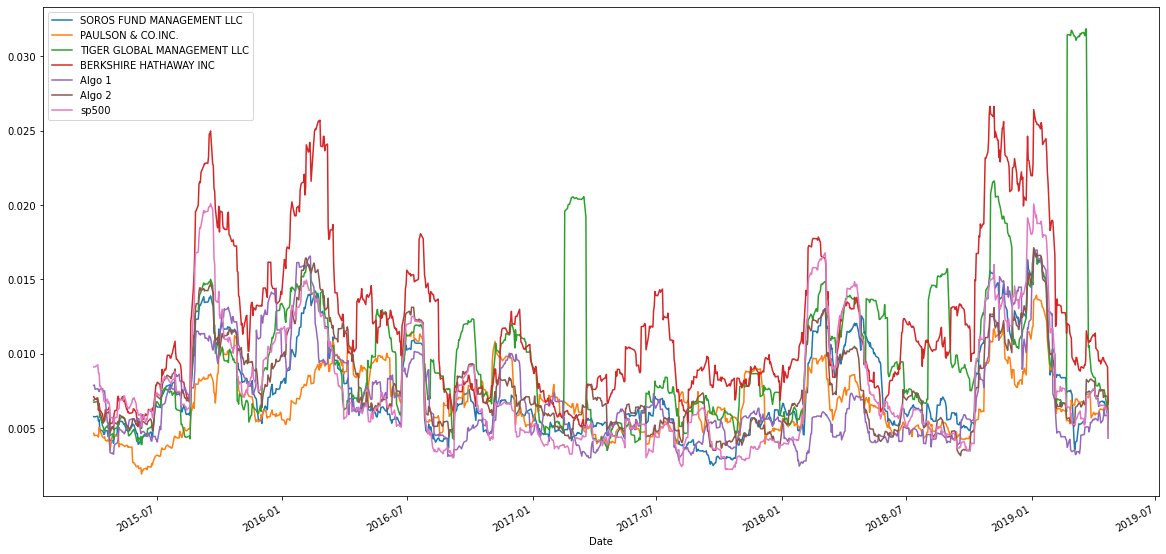

In [202]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_daily_return = daily_returns.rolling(window = 21).std()
# Plot the rolling standard deviation
rolling_daily_return.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

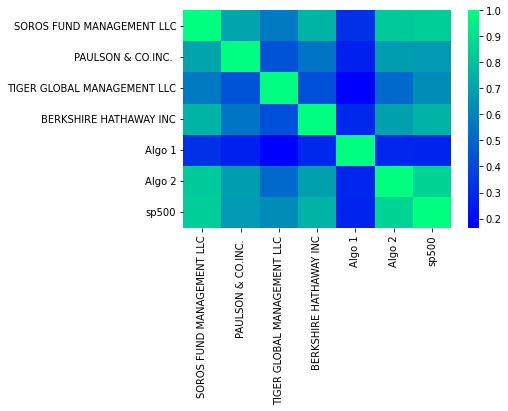

In [203]:
# Calculate the correlation
daily_corr = pd.DataFrame(daily_returns.corr())


# Display de correlation matrix
sns.heatmap(daily_corr, cmap='winter')


In [204]:
daily_corr.style.background_gradient(cmap='winter')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
sp500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

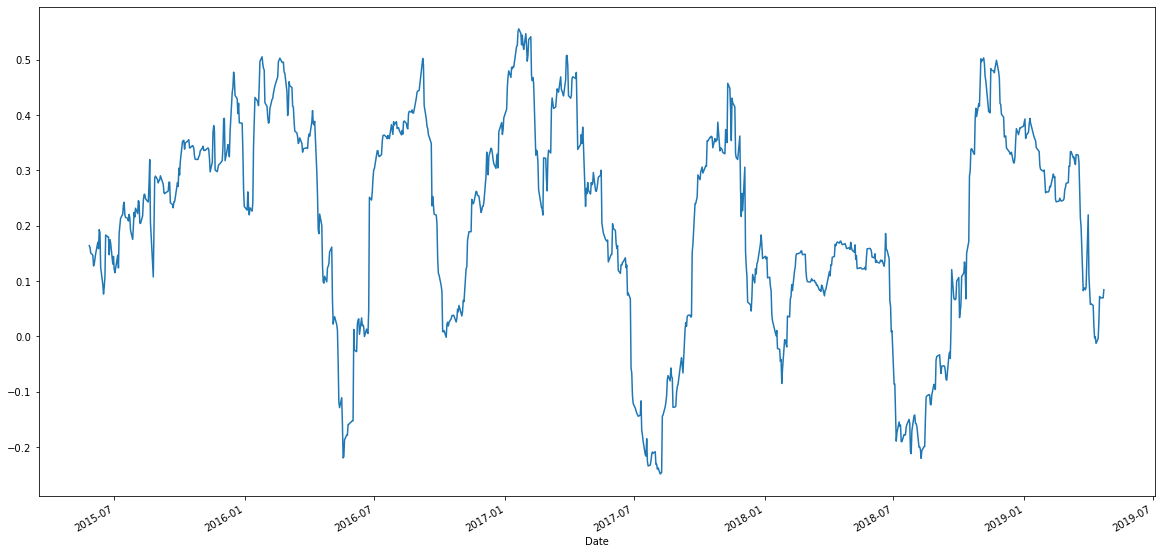

In [205]:
# Calculate covariance of a single portfolio
Covariance_Algo_1 = daily_returns['Algo 1'].rolling(window=60).cov(daily_returns['sp500'])
Covariance_Algo_1
# Calculate variance of S&P 500
Variance = daily_returns['sp500'].rolling(window=60).var()
# Computing beta
rolling_beta_Algo_1 = Covariance_Algo_1/Variance
rolling_beta_Algo_1
# Plot beta trend
rolling_beta_Algo_1.plot(figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

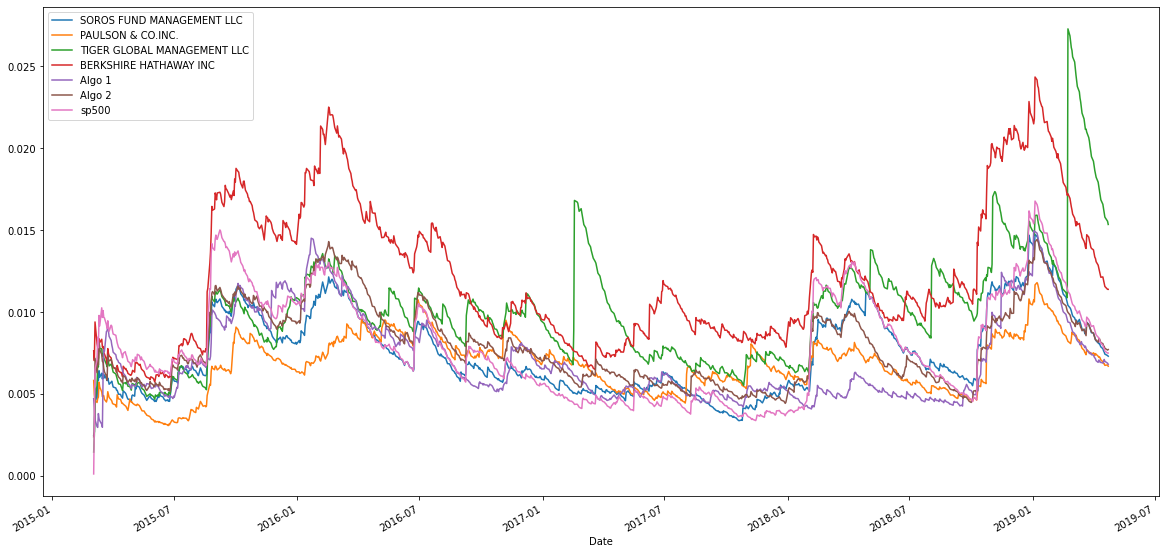

In [206]:
# Use `ewm` to calculate the rolling window
daily_returns_ewm = daily_returns.ewm(halflife=21).std()
daily_returns_ewm.plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [207]:
# Annualized Sharpe Ratios
sharpe_ratios = daily_returns.mean()*252/(daily_returns.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500                          0.648267
dtype: float64

<AxesSubplot:>

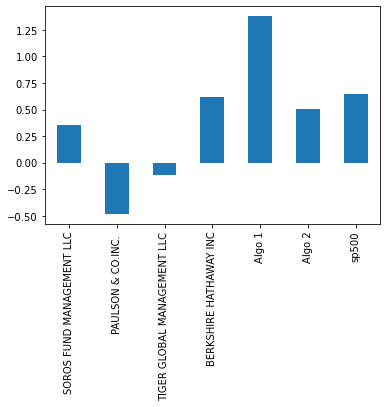

In [208]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Only Algo 1 outperformed Both S&P500 and the Whales port.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [209]:
# Reading data from 1st stock
aapl_df = pd.read_csv(Path("../Starter_Code/Resources/aapl_historical.csv"), index_col="Trade DATE", parse_dates = True, infer_datetime_format= True)
aapl_df.rename(columns = {"NOCP":"aapl"}, inplace = True)
aapl_df.drop(columns='Symbol', axis=1, inplace= True)
aapl_df.head()

,aapl
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [210]:
# Reading data from 2nd stock
cost_df = pd.read_csv(Path("../Starter_Code/Resources/cost_historical.csv"), index_col="Trade DATE", parse_dates = True, infer_datetime_format= True)
cost_df.rename(columns = {"NOCP":"cost"}, inplace = True)
cost_df.drop(columns='Symbol', axis=1, inplace= True)
cost_df.head()

,cost
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [211]:
# Reading data from 3rd stock
goog_df = pd.read_csv(Path("../Starter_Code/Resources/goog_historical.csv"), index_col="Trade DATE", parse_dates = True, infer_datetime_format= True)
goog_df.rename(columns = {"NOCP":"goog"}, inplace = True)
goog_df.drop(columns='Symbol', axis=1, inplace= True)
goog_df.head()

,goog
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [212]:
# Combine all stocks in a single DataFrame
My_port = pd.concat((aapl_df, cost_df, goog_df), axis=1, join='inner')
My_port.sort_index(ascending=True, inplace= True)
My_port.head()

,aapl,cost,goog
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [213]:
# Reset Date index




In [214]:
# Reorganize portfolio data by having a column per symbol


In [215]:
# Calculate daily returns
My_port_returns = My_port.pct_change()
# Drop NAs
My_port_returns.dropna(inplace= True)
# Display sample data
My_port_returns.head()

,aapl,cost,goog
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [216]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
My_port_weight = My_port_returns.dot(weights)


# Display sample data
My_port_weight

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [217]:
# Join your returns DataFrame to the original returns DataFrame
port_returns = pd.concat((My_port_weight, daily_returns) , axis= 1 , join="inner")
port_returns.rename(columns= {0:'My_port'}, inplace= True)

port_returns

,My_port,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,0.000340,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.009292,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001545,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.001217,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


In [218]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

port_returns.dropna(inplace= True)

port_returns


,My_port,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,0.000340,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.009292,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001545,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.001217,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [219]:
# Calculate the annualized `std`
port_std = pd.DataFrame(port_returns.std()).rename(columns= {0:'STD'})

port_std

,STD
My_port,0.013323
SOROS FUND MANAGEMENT LLC,0.009240
PAULSON & CO.INC.,0.007353
TIGER GLOBAL MANAGEMENT LLC,0.014648
BERKSHIRE HATHAWAY INC,0.015569
Algo 1,0.008423
Algo 2,0.008791
sp500,0.009578


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

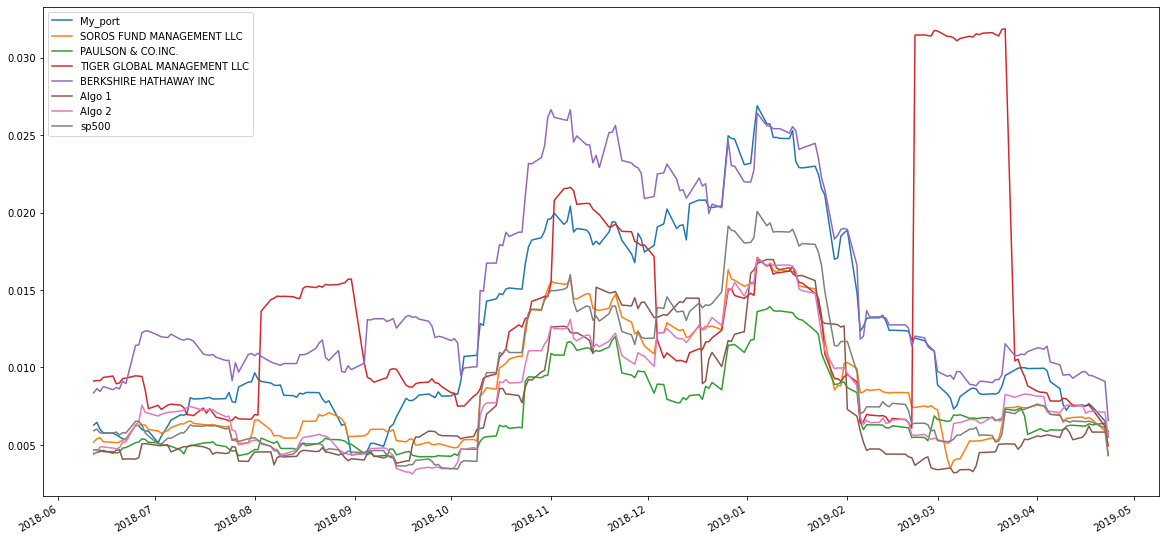

In [225]:
# Calculate rolling standard deviation

rolling_port_21 = port_returns.rolling(window=21).std()

# Plot rolling standard deviation
rolling_port_21.plot(figsize= (20,10))

### Calculate and plot the correlation

<AxesSubplot:>

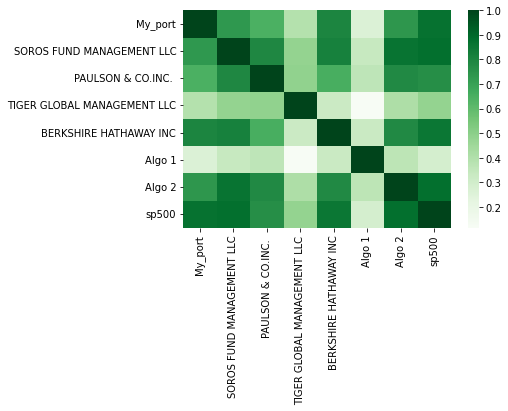

In [221]:
# Calculate and plot the correlation
correlation = port_returns.corr()
correlation

sns.heatmap(correlation, cmap='Greens') 

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

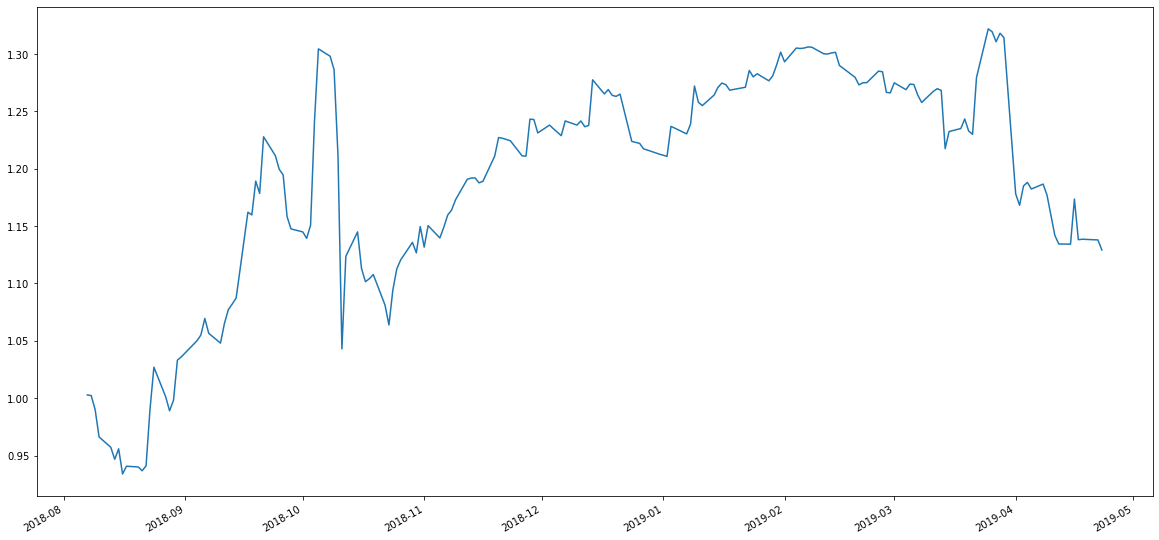

In [227]:
# Calculate and plot Beta
rolling_covariance = port_returns['My_port'].rolling(window=60).cov(port_returns['sp500'])
rolling_variance = port_returns['sp500'].rolling(window=60).var()

rolling_beta = rolling_covariance / rolling_variance

rolling_beta.plot(figsize=(20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [223]:
# Calculate Annualized Sharpe Ratios
trading_days = port_returns.count()
sharpe_ratios = port_returns.mean()*trading_days/(port_returns.std()*np.sqrt(trading_days))

<AxesSubplot:>

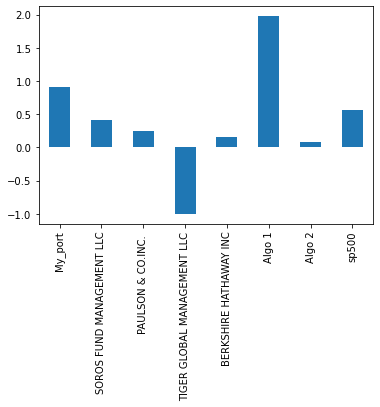

In [224]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar')

### How does your portfolio do?

My profolio has done better than the whales and S&P500 but not Algo 1.